In [1]:
# This convention would be followed by default in the book
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [2]:
from IPython.display import Markdown, display
def printbold(string):
    display(Markdown(string))

printbold("**Here we go!!**")

**Here we go!!**

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Print the Keys of cancer dataset: {}".format(cancer.keys()))

print("Print the 1st row: \n{}".format(cancer.data[0]))
print("\n")
print("print the shape of the data: {}".format(cancer['data'].shape))
print("\n")
print("print the name of the variables: {}".format(cancer['feature_names']))
print("\n")
print("Name of the target labels: {}".format(cancer['target_names']))
print("\n")
print("values in the target variable: {}".format(cancer.target[0:30]))
print("\n")
print("THe count of labels is: {}". format(np.bincount(cancer.target)))
print("** **"*15)

print("Sample counts per class:\n{}".format(dict(zip(cancer.target_names, np.bincount(cancer.target)))))

Print the Keys of cancer dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Print the 1st row: 
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


print the shape of the data: (569, 30)


print the name of the variables: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'wor

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Keys in the boston dataset: {}".format(boston.keys()))
print("Shape of the data boston: {}".format(boston.data.shape))

Keys in the boston dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Shape of the data boston: (506, 13)


In [5]:
printbold("**KNN Classfier**")

**KNN Classfier**

In [6]:
# KNN Classifier
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("Test Set Predictions: {}".format(clf.predict(X_test)))
print("Test Set Accuracy {:.2f}".format(clf.score(X_test, y_test)))


(19, 2)
(19,)
(7, 2)
Test Set Predictions: [1 0 1 0 1 0 0]
Test Set Accuracy 0.86


Optimal no. of neighbors seems to be 6


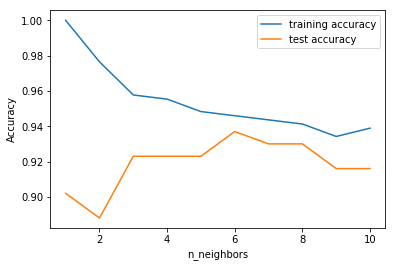

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
        # build the model
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Ok = """Optimal no. of neighbors seems to be 6"""; print(Ok)

In [8]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print("Predictions of Test set: {}".format(reg.predict(X_test)))
print("Test set R-squared: {:.2f}".format(reg.score(X_test, y_test)))

Predictions of Test set: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R-squared: 0.83


In [9]:
ok = """K Nearest Neighbor generally works well if independent features are 100 or lesser. Data must be preprocessed.
k-NN is quite easier to understand. There are only two parameters to figure out: no. of neighbors to take and how you 
measure distance b/w datapoints (Euclidean distance is used generlly). """
print(ok)

K Nearest Neighbor generally works well if independent features are 100 or lesser. Data must be preprocessed.
k-NN is quite easier to understand. There are only two parameters to figure out: no. of neighbors to take and how you 
measure distance b/w datapoints (Euclidean distance is used generlly). 


In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print("SHape of the dataset is: {}".format(boston.data.shape))

ok = """For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input
features, but also looking at all products (also called interactions) between features. In other words, we will not only
consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility.
It's binomial coefficient. Number of combinations of k elements that can be selected from a set of n elements. Often this is
written as [n/k] and spoken as “n choose k”—in this case, “13 choose 2 = 104.”"""
print(ok)

X, y =mglearn.datasets.load_extended_boston()
print("Shape of X: {}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f" R-Squared on training set: {round(lr.score(X_train, y_train),2)}")
print(f" R-Squared on test set: {round(lr.score(X_test, y_test),2)}")
print("\n")
ok1 = """There is a case of overfitting as R-square for training set is way higher than test set. TO get rid of overfitting,
we look at Ridge Regression in the next box."""
print(ok1)

SHape of the dataset is: (506, 13)
For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input
features, but also looking at all products (also called interactions) between features. In other words, we will not only
consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility.
It's binomial coefficient. Number of combinations of k elements that can be selected from a set of n elements. Often this is
written as [n/k] and spoken as “n choose k”—in this case, “13 choose 2 = 104.”
Shape of X: (506, 104)
 R-Squared on training set: 0.95
 R-Squared on test set: 0.61


There is a case of overfitting as R-square for training set is way higher than test set. TO get rid of overfitting,
we look at Ridge Regression in the next box.


In [11]:
printbold("**Ridge Regression or L2 Regularization**")

**Ridge Regression or L2 Regularization**

In [12]:
X, y =mglearn.datasets.load_extended_boston()

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) #Default value of alpha is zero
print("Accuracy on training set with 1 alpha: {:.2f}".format(ridge.score(X_train, y_train)))
print(f"Accuracy on test set: {round(ridge.score(X_test, y_test),2)}")

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Accuracy on training set with alpha as 10: {:.2f}".format(ridge10.score(X_train, y_train)))
print(f"Accuracy on test set with alpha as 10: {round(ridge10.score(X_test, y_test),2)}")

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Accuracy on training set with 0.1 alpha: {:.2f}".format(ridge01.score(X_train, y_train)))
print(f"Accuracy on test set with 0.1 alpha: {round(ridge01.score(X_test, y_test),2)}")

print("\n")
ok = """Increasing the value of alpha means all feature coefficients would be smaller and move towards zero"""
print(ok)

Accuracy on training set with 1 alpha: 0.89
Accuracy on test set: 0.75
Accuracy on training set with alpha as 10: 0.79
Accuracy on test set with alpha as 10: 0.64
Accuracy on training set with 0.1 alpha: 0.93
Accuracy on test set with 0.1 alpha: 0.77


Increasing the value of alpha means all feature coefficients would be smaller and move towards zero


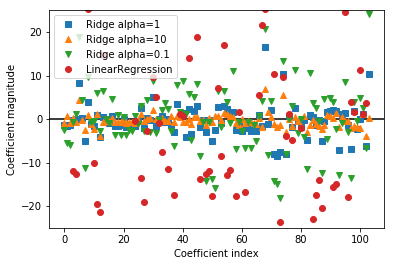

In [13]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [14]:
printbold("**Lasso or L1 Regularization**")

**Lasso or L1 Regularization**

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training Set Accuracy with 1 alpha:  {:.2f}".format(lasso.score(X_train, y_train)))
print("Test Set Accuracy: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ !=0)))
print("\n")

lasso01 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training Set Accuracy with 0.01 alpha:  {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test Set Accuracy with 0.01 alpha: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used with 0.01 alpha: {}".format(np.sum(lasso01.coef_ !=0)))
print("\n")

lasso2 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training Set Accuracy with 0.001 alpha:  {:.2f}".format(lasso2.score(X_train, y_train)))
print("Test Set Accuracy with 0.001 alpha: {:.2f}".format(lasso2.score(X_test, y_test)))
print("Number of features used with 0.001 alpha: {}".format(np.sum(lasso2.coef_ !=0)))

print("\n")
ok = """At alpha=1, most of variables are zero and only 4 variables been used. When we use alpha=0.01, model seems to give
best result and only use 33 features out of 104. max_iter is the max number of iterations that has to be run."""
print(ok)

Training Set Accuracy with 1 alpha:  0.29
Test Set Accuracy: 0.21
Number of features used: 4


Training Set Accuracy with 0.01 alpha:  0.90
Test Set Accuracy with 0.01 alpha: 0.77
Number of features used with 0.01 alpha: 33


Training Set Accuracy with 0.001 alpha:  0.95
Test Set Accuracy with 0.001 alpha: 0.64
Number of features used with 0.001 alpha: 94


At alpha=1, most of variables are zero and only 4 variables been used. When we use alpha=0.01, model seems to give
best result and only use 33 features out of 104. max_iter is the max number of iterations that has to be run.


In [16]:
printbold("**Logistic Regression**")

**Logistic Regression**

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training Set Score with default values: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(logreg.score(X_test, y_test)))
print("\n")

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training Set Score with cost as 100: {:.2f}".format(logreg100.score(X_train, y_train)))
print("Test Set Score with cost as 100: {:.2f}".format(logreg100.score(X_test, y_test)))
print("\n")

logreg01 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training Set Score with 0.01 cost: {:.2f}".format(logreg01.score(X_train, y_train)))
print("Test Set Score with 0.01 cost: {:.2f}".format(logreg01.score(X_test, y_test)))
print("\n")

ok = """By default logistic reg implements L2 regularization. Here C is the inverse of regularization strength. Means, lower
th value of C, smaller would be the coefficients of variables. This regularization parameter is called alpha in regression
and C in SVCClassfier and LogisticRegression."""
print(ok)

print("\n")
# Same model with now L1 regularization
logregL1 = LogisticRegression(C=100, penalty='l1').fit(X_train, y_train)
print("Training Set Score with cost as 100 with L1 regularization: {:.2f}".format(logregL1.score(X_train, y_train)))
print("Training Set Score with cost as 100 with L1 regularization: {:.2f}".format(logregL1.score(X_test, y_test)))

Training Set Score with default values: 0.96
Test Set Score: 0.96


Training Set Score with cost as 100: 0.97
Test Set Score with cost as 100: 0.97


Training Set Score with 0.01 cost: 0.93
Test Set Score with 0.01 cost: 0.93


By default logistic reg implements L2 regularization. Here C is the inverse of regularization strength. Means, lower
th value of C, smaller would be the coefficients of variables. This regularization parameter is called alpha in regression
and C in SVCClassfier and LogisticRegression.


Training Set Score with cost as 100 with L1 regularization: 0.99
Training Set Score with cost as 100 with L1 regularization: 0.98


In [18]:
# Method chaining. We can fit and predict a model in one line itself

logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)
# or THis works as well
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

In [19]:
printbold("**Decision Tree**")

**Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=42)
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, y_train)
print("Accuracy on train set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(tree1.score(X_test, y_test)))

print("\n")
ok = """As we can see, the tree has been overfit in the training data as we havent done any pr-pruning. Lets set its max
depth. Max_depth is the consecutive questions that can be asked. Read the corresponding prep notes for more on pruning"""
print(ok)
print("\n")

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))



Accuracy on train set: 1.000
Accuracy on the test set: 0.937


As we can see, the tree has been overfit in the training data as we havent done any pr-pruning. Lets set its max
depth. Max_depth is the consecutive questions that can be asked. Read the corresponding notes for more on pruning


Accuracy on training set: 0.988
Accuracy on test set: 0.951


Feature importance(s) of the tree
Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


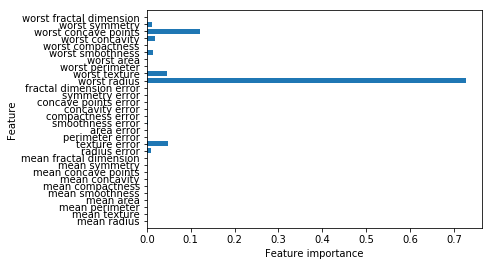

In [34]:
ok = """Feature importance(s) of the tree"""
print(ok)
print("Feature importances:\n{}".format(tree.feature_importances_))

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)


In [36]:
printbold("**Random Forest Algorithm**")

**Random Forest Algorithm**

The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without
tuning any parameters. We could adjust the max_fea tures setting, or apply pre-pruning as we did for the single decision
tree. However, often the default parameters of the random forest already work quite well.


Accuracy on training set: 1.000
Accuracy on test set: 0.972




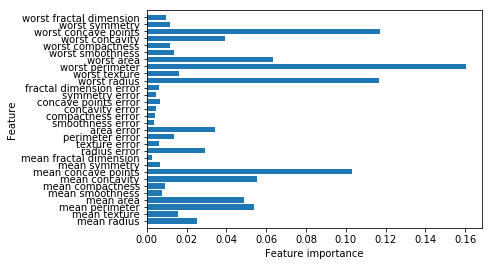

In [43]:
ok= """The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without
tuning any parameters. We could adjust the max_fea tures setting, or apply pre-pruning as we did for the single decision
tree. However, often the default parameters of the random forest already work quite well."""
print(ok)
print("\n")
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

print("\n")
plot_feature_importances_cancer(forest)


In [44]:
printbold("**Gradient Boosting Machine**")

**Gradient Boosting Machine**

In [46]:
ok = """By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used. As the training set accuracy is 100%,
we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum
depth or lower the learning rate"""
print(ok)
print("\n")
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used. As the training set accuracy is 100%,
we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum
depth or lower the learning rate


Accuracy on training set: 1.000
Accuracy on test set: 0.958


With a lower learning rate, we need to make higher no. of trees so that gbm is able to fit better. Generally,
n_estimtors is decided and then search over diff learning rates. max_depth (max_leaf_nodes)is usually 1-5. 


Accuracy on training set with max_depth of 1: 0.991
Accuracy on test set with max_depth of 1: 0.972


Accuracy on training set with learning rate of 0.01: 0.988
Accuracy on test set with learning rate of 0.01: 0.965


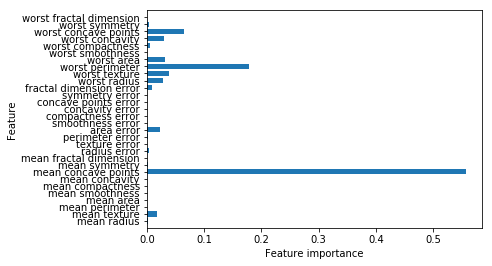

In [50]:
ok = """With a lower learning rate, we need to make higher no. of trees so that gbm is able to fit better. Generally,
n_estimtors is decided and then search over diff learning rates. max_depth (max_leaf_nodes)is usually 1-5. """
print(ok)
print("\n")
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set with max_depth of 1: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set with max_depth of 1: {:.3f}".format(gbrt.score(X_test, y_test)))
print("\n")

gbrt1 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt1.fit(X_train, y_train)
print("Accuracy on training set with learning rate of 0.01: {:.3f}".format(gbrt1.score(X_train, y_train)))
print("Accuracy on test set with learning rate of 0.01: {:.3f}".format(gbrt1.score(X_test, y_test)))
plot_feature_importances_cancer(gbrt1)

In [51]:
printbold("**Kernel Support Vector Machine**")

**Kernel Support Vector Machine**

Such bad results on test set beause input features have diff magnitude of order. some are in 10s, others 1000s.
We need to scale and normalize the data. we can do this using MinMaxScaler.
Accuracy on training set: 1.00
Accuracy on test set: 0.63


Text(0,0.5,'Feature magnitude')

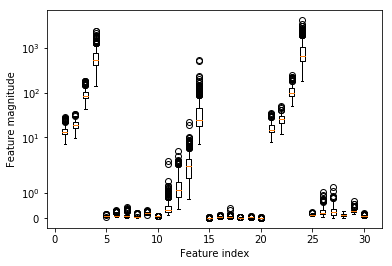

In [54]:
ok = """Such bad results on test set beause input features have diff magnitude of order. some are in 10s, others 1000s.
We need to scale the data to have similar range. we can do this using MinMaxScaler."""
print(ok)

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))



plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")



In [56]:

# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range. afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))
print("\n")

# use THE SAME transformation on the test set,using min and range of the training set. See Chapter 3 (next) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set with scaled data: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set with scaled data: {:.3f}".format(svc.score(X_test_scaled, y_test)))
print("\n")


svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set with scaled data and C=100: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set with scaled data and C=100: {:.3f}".format(svc.score(X_test_scaled, y_test)))



Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Accuracy on training set with trasformed data: 0.948
Accuracy on test set with trasformed data: 0.951


Accuracy on training set with trasformed data and C=100: 0.988
Accuracy on test set with trasformed data and C=100: 0.972


In [57]:
printbold("**Neural Networks**")

**Neural Networks**

In [64]:

from sklearn.neural_network import MLPClassifier
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))
print("\n")
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set w/o data being scaled: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set w/o data being scaled: {:.2f}".format(mlp.score(X_test, y_test)))



print("\nScaling the data then applying MLP")
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation. afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on scaled training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on scaled test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("\nWe increase the max_iteration so that model is able to merge as given warning in last trained model.")
mlp_iter = MLPClassifier(max_iter=1000, random_state=0)
mlp_iter.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp_iter.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp_iter.score(X_test_scaled, y_test)))

print("\nHere we choose regularization param alpha quite aggressiely; from 0.0001 to 1 now")
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


Accuracy on training set w/o data being scaled: 0.91
Accuracy on test set w/o data being scaled: 0.88

Scaling the data then applying MLP


C:\Users\TheJuniorLebowski\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on scaled training set: 0.991
Accuracy on scaled test set: 0.965

We increase the max_iteration so that model is able to merge as given warning in last trained model.
Accuracy on training set: 0.993
Accuracy on test set: 0.972

Here we choose regularization param alpha quite aggressiely; from 0.0001 to 1 now
Accuracy on training set: 0.988
Accuracy on test set: 0.972
